trace ID,  21b0fead811eeff6
1c8a283a400559e8
1e604c2b56bbaa92
21b0fead811eeff6
23d221196221103d
1731ff24a1e6640c
53c8288e969f7d71
f514bf2917b3eb4c
de94ba49b900351b
2ce04f8f6046a588
942bd06f1dc186d8
237e1afb1f104902
80e89e7eaa213d21
a8879c49c944be1f
ff4524757bbbd851
55441b6714cd1427
f86a2be51a561c61
[{'spanID': '1c8a283a400559e8', 'parent': '1e604c2b56bbaa92', 'operationName': 'Follow', 'processID': 'p1'}, {'spanID': '1e604c2b56bbaa92', 'parent': 0, 'operationName': '/api/user/follow', 'processID': 'p1'}, {'spanID': '21b0fead811eeff6', 'parent': 0, 'operationName': '/api/user/follow', 'processID': 'p1'}, {'spanID': '23d221196221103d', 'parent': '1731ff24a1e6640c', 'operationName': 'social_graph_redis_update_client', 'processID': 'p2'}, {'spanID': '1731ff24a1e6640c', 'parent': '53c8288e969f7d71', 'operationName': 'follow_server', 'processID': 'p2'}, {'spanID': '53c8288e969f7d71', 'parent': '1c8a283a400559e8', 'operationName': 'follow_with_username_server', 'processID': 'p2'}, {'spanID': 

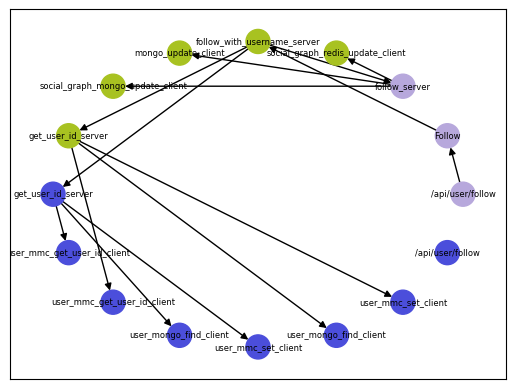

In [3]:
# First networkx library is imported
# along with matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import json
import random


# Defining a Class
class GraphVisualization:
    def __init__(self):
        self.visual = []

    def addEdge(self, a, b):
        temp = [a, b]
        self.visual.append(temp)

    def visualize(self,labels=[], isolated_nodes=[], colored_nodes=[]):
        G = nx.MultiDiGraph()
        G.add_edges_from(self.visual)

        # Add isolated nodes
        G.add_nodes_from(isolated_nodes)
        layout_algorithm = nx.circular_layout
        pos = layout_algorithm(G)

        nx.draw_networkx(G, pos,with_labels=True,labels=labels,font_size=6,node_color=node_colors)
        plt.savefig("followUser.svg", format="svg", dpi=300)
        plt.show()

# read data from server
f=open('/content/followUser.json')
dataTrace = json.load(f)
myData = dataTrace['data']
trace = myData[0]
traceID = trace['traceID']
print('trace ID, ',traceID)
data = []
spanIds=[]
for item in trace['spans']:
    refrences = item['references']
    parent = 0
    if len(refrences) != 0:
        parent = refrences[0]['spanID']
        if parent == traceID:
            parent = 0

    row = {
        "spanID": item['spanID'],
        "parent": parent,
        "operationName": item['operationName'],
        "processID": item['processID']
    }
    data.append(row)
    spanIds.append(item['spanID'])



isolated=[]


G = GraphVisualization()
for item in data:
    if item['parent'] != 0 and item['parent'] != traceID and item['parent'] in spanIds:
        G.addEdge(item['parent'], item['spanID'])
    else:
        isolated.append(item['spanID'])
# Call the visualize function and specify isolated and colored nodes

node_labels = {item['spanID']: item['operationName'] for item in data}


# set up color for process
process=[]
for item in data:
    process.append(item['processID'])
    print(item['spanID'])
process_ids = set(process)
color_mapping = {process_id: f'#%06x' % random.randint(0, 0xFFFFFF) for process_id in process_ids}

node_colors = []
for item in data:
    node_colors.append(color_mapping[item['processID']])

print(data)
print('size of ',len(node_colors),',',len(node_labels),',',len(data))
G.visualize(isolated_nodes=isolated, labels=node_labels,colored_nodes=node_colors)
